# Table of contents
1. [Introduction](#introduction)
2. [Project Description](#paragraph1)
3. [Description of the data](#paragraph2)
4. [Feature naming](#paragraph3)

    
## Introduction <a name="introduction"></a>
Project for Yandex Practicum Course - 2nd Integrated Project for Yandex Practicum Data Science Course
    
## Project Description <a name="paragraph1"></a>


+ **Main goals of the project:**
    + Create a model to help predict the amount of gold recovered from gold ore.
    + The model haves the main goal to optimize the process of production for the company Zyfra, i.e. eliminate unprofitable parameters;


## Description of the data <a name="paragraph2"></a>

+ **Technological process**

    + Rougher feed — raw material
    + Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
        + Xanthate — promoter or flotation activator;
        + Sulphate — sodium sulphide for this particular process;
        + Depressant — sodium silicate.
    + Rougher process — flotation
    + Rougher tails — product residues
    + Float banks — flotation unit
    + Cleaner process — purification
    + Rougher Au — rougher gold concentrate
    + Final Au — final gold concentrate

+ **Parameters of stages**

    + air amount — volume of air
    + fluid levels
    + feed size — feed particle size
    + feed rate

## Feature naming: <a name="paragraph3"></a>
    
+ **Possible values for [stage]:**

    + rougher — flotation
    + primary_cleaner — primary purification
    + secondary_cleaner — secondary purification
    + final — final characteristics

+ **Possible values for [parameter_type]:**

    + input — raw material parameters
    + output — product parameters
    + state — parameters characterizing the current state of the stage
    + calculation — calculation characteristics

#### 1.1. 
Open the files and look into the data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


try:
    df_train = pd.read_csv('gold_recovery_train.csv')
    df_test = pd.read_csv('gold_recovery_test.csv')
    df_full = pd.read_csv('gold_recovery_full.csv')
    
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    df_test= pd.read_csv('/datasets/gold_recovery_test.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [9]:
print('Check for Dataset Train Duplicate:', df_train.duplicated().sum())
print('Check for Dataset Test Duplicate:', df_test.duplicated().sum())
print('Check for Dataset Full Duplicate:', df_full.duplicated().sum())

Check for Dataset Train Duplicate: 0
Check for Dataset Test Duplicate: 0
Check for Dataset Full Duplicate: 0


#### Considerations:

    Date needs to be change to datetime data type;
    Test data set haves fewer columns than Train and Full data set;
    Data sets have missing values that need to be fixed
    Data sets have no duplicate values

#### 1.2. 
Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [10]:
C_train = df_train['rougher.output.concentrate_au']
F_train = df_train['rougher.input.feed_au']
T_test = df_train['rougher.output.tail_au']

In [11]:
def recovery_MAE(C, F, T, df_column):
    recovery = ((C*(F-T))/(F*(C-T))) * 100
    df_recovery = pd.DataFrame({'output': df_column, 'recovery': recovery})
    df_recovery = df_recovery.dropna()
    MAE = mean_absolute_error(df_recovery['output'], df_recovery['recovery'])
    print('MAE:', MAE)
    return 

In [12]:
recovery_MAE(C_train, F_train, T_test, df_train['rougher.output.recovery'])

MAE: 9.303415616264301e-15


#### Considerations:
    results are correct, MAE near 0

#### 1.3.
Analyze the features not available in the test set. What are these parameters? What is their type?

In [13]:
def df_differences(df1, df2):
    dif = set(df1.columns).symmetric_difference(set(df2.columns))
    print('It haves less:', len(dif), 'columns')
    return dif
    

In [14]:
df_differences(df_full, df_test)

It haves less: 34 columns


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### 1.4. 
Perform data preprocessing.

In [15]:
print(df_train['date'].isnull().sum())
print(df_test['date'].isnull().sum())
print(df_full['date'].isnull().sum())

0
0
0


In [16]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%dT%H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%dT%H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

In [18]:
df_train.shape[0], df_train.shape[1]

(16860, 87)

In [19]:
df_full.shape[0], df_full.shape[1]

(22716, 87)

In [20]:
df_test.shape[0], df_test.shape[1]

(5856, 53)

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def KNN_null_treatment(df, column):
    df1 = df.drop([column], axis=1)
    df2 = df[[column]]
    scaler = StandardScaler().fit(df1)
    df_scaled = scaler.transform(df1)
    imputer = KNNImputer().fit(df_scaled)
    df_knn = imputer.transform(df_scaled)
    df_knn = pd.DataFrame(df_knn, columns=df1.columns)
    df_final = df2.join(df_knn, how='outer')
    return df_final

In [22]:
df_train_treat = KNN_null_treatment(df_train, 'date') 
df_test_treat = KNN_null_treatment(df_test, 'date') 
df_full_treat = KNN_null_treatment(df_full, 'date') 

In [23]:
#add the collumns missing in test set
df_test_treat = df_full_treat[df_full_treat['date'].isin(df_test_treat['date'])]

In [24]:
df_train.shape[0], df_train.shape[1]

(16860, 87)

In [25]:
df_test_treat.shape[0], df_test_treat.shape[1]

(5856, 87)

In [26]:
df_test_treat.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5521,2016-09-01 00:59:59,1.377688,0.424359,0.885248,0.055436,0.243298,1.070315,1.140224,0.380438,1.354547,...,-0.942233,0.025951,-1.120967,-0.263871,-1.088510,0.973691,-1.173155,0.006131,1.315402,0.260377
5522,2016-09-01 01:59:59,1.493672,0.459910,0.944756,-0.029623,0.125945,1.110193,1.202852,0.394444,1.463138,...,-0.936961,0.014740,-1.100754,-0.246231,-1.086673,-0.308765,-1.172054,0.004549,1.061343,0.258919
5523,2016-09-01 02:59:59,1.399860,0.411275,0.970526,0.053966,0.059895,1.152456,1.293369,0.359468,1.584921,...,-0.951560,0.013847,-1.106781,-0.258949,-1.068974,0.034579,-1.167490,0.008777,1.057564,0.248278
5524,2016-09-01 03:59:59,1.857509,0.435791,1.171549,-0.053007,0.028315,1.002961,1.086658,0.400109,1.696351,...,-0.940779,0.019036,-1.110661,-0.244528,-1.096274,0.033662,-1.162927,0.007066,1.050640,0.273618
5525,2016-09-01 04:59:59,1.624181,0.348987,1.013253,0.018910,-0.514853,0.825551,0.961861,0.460832,1.923769,...,-0.941957,-0.011306,-1.114245,-0.254367,-1.063194,-0.085067,-1.158363,0.002045,1.058840,0.245181


In [27]:
df_test_treat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 5521 to 17208
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                5856 non-null   datetime64[ns]
 1   final.output.concentrate_ag                         5856 non-null   float64       
 2   final.output.concentrate_pb                         5856 non-null   float64       
 3   final.output.concentrate_sol                        5856 non-null   float64       
 4   final.output.concentrate_au                         5856 non-null   float64       
 5   final.output.recovery                               5856 non-null   float64       
 6   final.output.tail_ag                                5856 non-null   float64       
 7   final.output.tail_pb                                5856 non-null   float64       
 8   fina

#### Considerations
    Null values were treated using the KNN method
    Date data type fixed to datetime

#### 2.1. 
Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [28]:
metals = ['au', 'ag', 'pb']

stages = ['rougher.output.concentrate_',\
          'primary_cleaner.output.concentrate_',\
          'final.output.concentrate_']

stages_label = ['flotation',\
               'primary_cleaner',\
               'final characteristics']

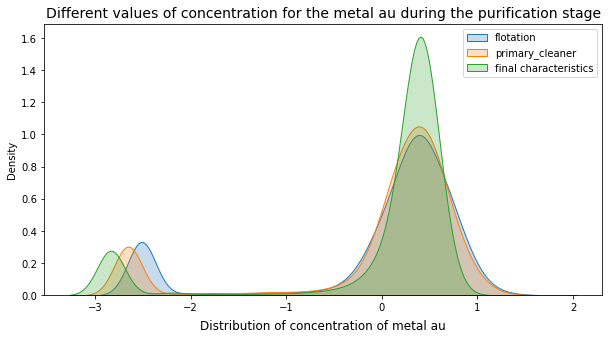

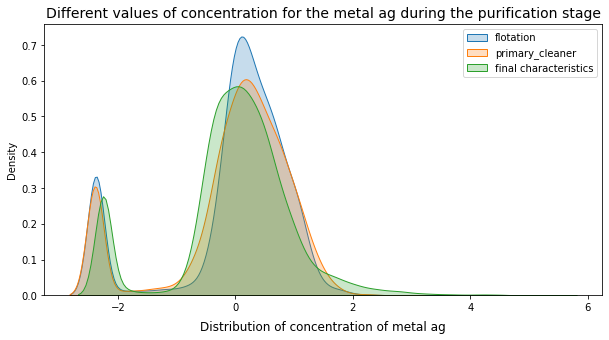

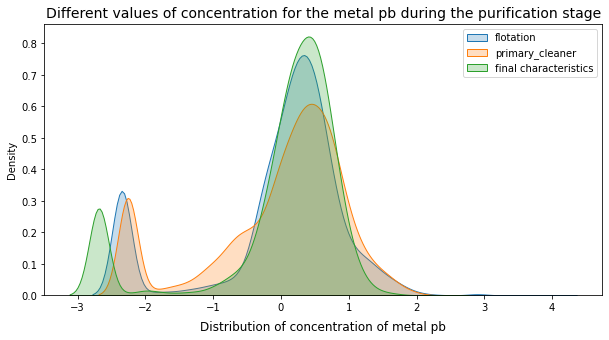

In [29]:
for metal in metals:
    plt.figure(figsize=(10,5))
    for stage, lab in zip(stages, stages_label):
        ax = sns.kdeplot(df_train_treat[stage+metal], shade=True, label=lab)
        ax.legend()
        ax.set_xlabel(('Distribution of concentration of metal ' + metal), fontsize=12, labelpad=7.5)
        ax.set_title(('Different values of concentration for the metal ' + metal + ' during the purification stage'), fontsize=14)
    plt.show()
    

In [30]:
def boxplot_process(metal, df):
    ax = sns.boxplot(data=df[['rougher.output.concentrate_'+metal, 'primary_cleaner.output.concentrate_'+metal, 'final.output.concentrate_'+metal]], showfliers = False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.show()
    

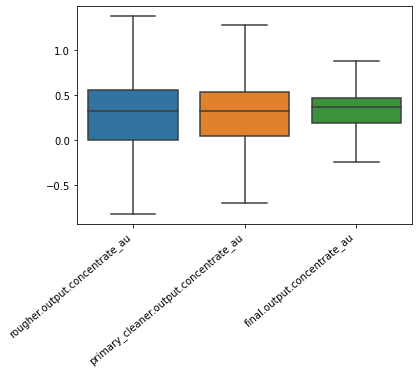

In [31]:
boxplot_process('au', df_train_treat)

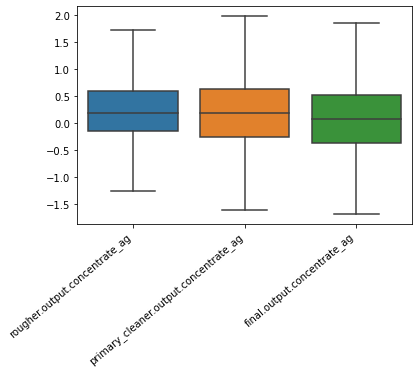

In [32]:
boxplot_process('ag', df_train_treat)

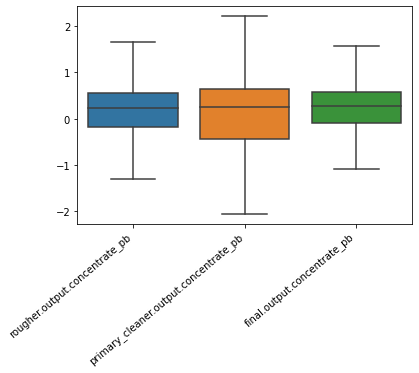

In [33]:
boxplot_process('pb', df_train_treat)

#### Considerations
    - After analysing both density graphs and boxplots it is shown that both 'au' and 'pb' metals increase their concentration over the stages. However the metal 'ag' appears to decrease his concentration with each stage.
    - Also by analyzing the graphics it is possible to conclude that there are many outliers.

#### 2.2. 
Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

Text(0.5, 1.0, 'Test dataset')

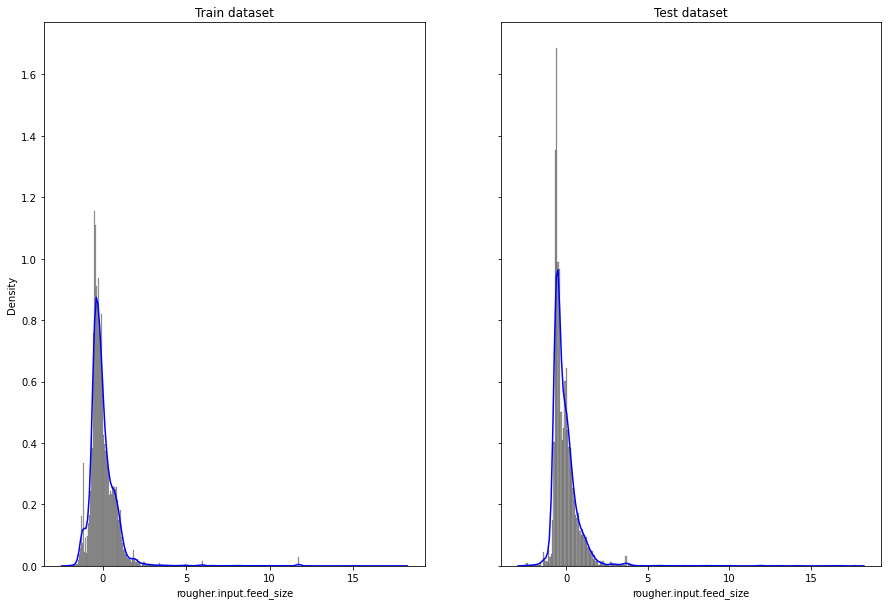

In [34]:
f, axes = plt.subplots(1, 2, figsize = (15,10), sharey=True)
sns.histplot(df_train_treat['rougher.input.feed_size'], stat="density", ax=axes[0], color ='gray')
sns.kdeplot(df_train_treat['rougher.input.feed_size'], color='b', ax=axes[0])
axes[0].set_title('Train dataset')
sns.histplot(df_test_treat['rougher.input.feed_size'], stat="density", ax=axes[1], color ='gray')
sns.kdeplot(df_test_treat['rougher.input.feed_size'], color='b', ax=axes[1])
axes[1].set_title('Test dataset')

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

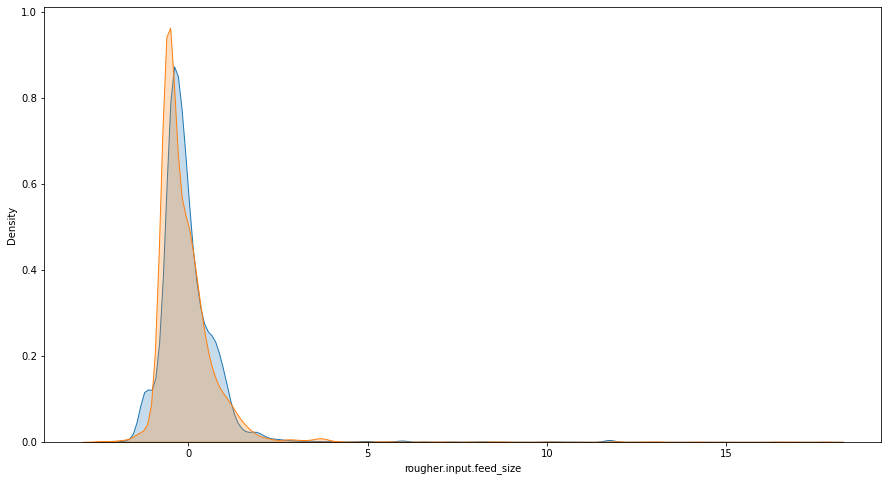

In [35]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train_treat['rougher.input.feed_size'] ,shade=True)
sns.kdeplot(df_test_treat['rougher.input.feed_size'] ,shade=True)

In [38]:
print('Average particle size for train dataset:', df_train_treat['rougher.input.feed_size'].mean())
print('Average particle size for test dataset:', df_test_treat['rougher.input.feed_size'].mean())

Average particle size for train dataset: -0.011848996898914802
Average particle size for test dataset: -0.08578468381146741


#### Considerations
    From the visual analysis of the graphs it could be concluded that the distributions are similar ie the model evaluation is correct.
    Also both train and test dataset share a very similar means contributing to validate the model

#### 2.3. 
Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

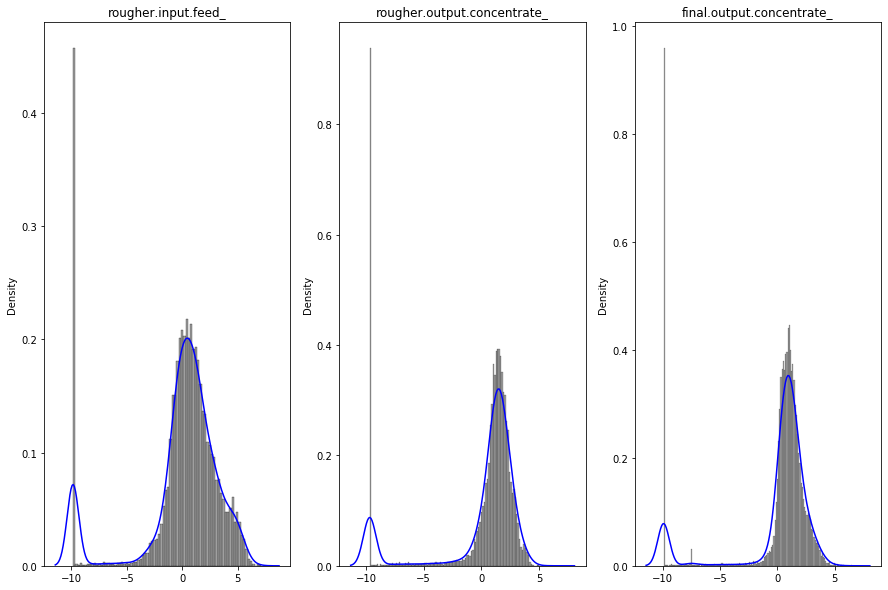

In [36]:
concentration_stages = ['rougher.input.feed_',\
                        'rougher.output.concentrate_',\
                        'final.output.concentrate_',]
f, axes = plt.subplots(1, 3, figsize = (15,10), sharey=False)

for stage, axs in zip(concentration_stages, axes):
    df_study = df_train_treat[stage+'au'] + df_train_treat[stage+'pb'] + df_train_treat[stage+'ag'] + df_train_treat[stage+'sol']
    axs.set_title(stage)
    sns.histplot(df_study, ax=axs, color ='gray', stat="density")
    sns.kdeplot(df_study, color='b', ax=axs)
plt.show()

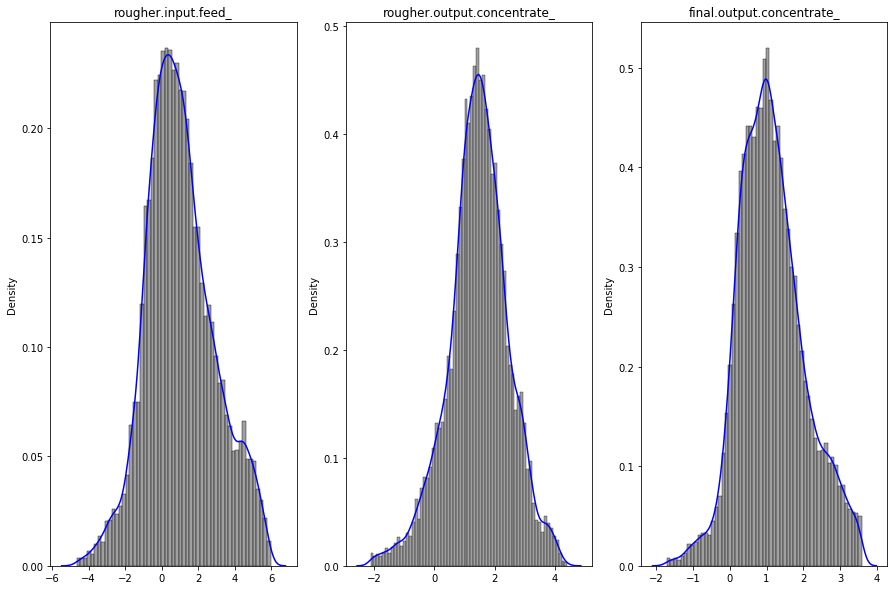

In [37]:
f, axes = plt.subplots(1, 3, figsize = (15,10), sharey=False)

for stage, axs in zip(concentration_stages, axes):
    df_study = df_train_treat[stage+'au'] + df_train_treat[stage+'pb'] + df_train_treat[stage+'ag'] + df_train_treat[stage+'sol']
    IQ1 = df_study.quantile(0.25)
    IQ3 = df_study.quantile(0.75)
    IQR = IQ3 - IQ1
    df_study_outliers = df_study.loc[(df_study >= (IQ1 - 1.5 * IQR)) & (df_study <= (IQ3 + 1.5 *IQR))]
    axs.set_title(stage)
    sns.histplot(df_study_outliers, ax=axs, color ='gray', stat="density")
    sns.kdeplot(df_study_outliers, color='b', ax=axs)
plt.show()

#### Considerations:

    - As seen in step 2.1 and again shown in the graphs above, you could see the existence of outliers that are worth removing.
    - After removing outliers using the IQR method we are provided with cleaner look of the process, were it can be seen that after each step, the concentration of the metal tends to increase.

#### 3.1. 
Write a function to calculate the final sMAPE value.

In [38]:
def smape(y_true, y_pred):
    N = len(y_true)
    return ((1/N) * np.sum(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))) * 100



In [39]:
def smape_final(y_true,y_pred):
    rougher = smape(y_true[target.index('rougher.output.recovery')], y_pred[target.index('rougher.output.recovery')])
    final = smape(y_true[target.index('final.output.recovery')], y_pred[target.index('final.output.recovery')])
    return 0.25*rougher + 0.75*final

#### 3.2. 
Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [40]:
target = ['rougher.output.recovery', 'final.output.recovery']

df_train_model = df_train_treat[df_train_treat.columns.drop(list(df_train_treat.filter(regex= "date|ag|au|pb|sol")))]
df_test_model = df_test_treat[df_test_treat.columns.drop(list(df_test_treat.filter(regex= "date|ag|au|pb|sol")))]

features = list(df_train_model.columns)

print(df_train_model.shape)
print(df_test_model.shape)

(16860, 50)
(5856, 50)


In [41]:
X_train, X_test = df_train_model[features].values, df_test_model[features].values
y_train, y_test = df_train_model[target].values, df_test_model[target].values

In [42]:
smape_score = make_scorer(smape_final)

#### Linear Regression Model 

- with 5-fold cross validation

In [43]:
%%time

### Linear regression
lr = LinearRegression().fit(X_train, y_train)

score_lr = cross_val_score(lr, 
                           X_train, 
                           y_train, 
                           cv=5, 
                           scoring=smape_score)

print("mean smape:", score_lr.mean())
score_lr

mean smape: 4.117447434828301e-13
CPU times: user 876 ms, sys: 846 ms, total: 1.72 s
Wall time: 1.72 s


array([1.23398947e-12, 2.30999210e-13, 1.07752874e-13, 2.78416736e-13,
       2.07565429e-13])

#### Decision Tree Regressor Model 

- with max depth with a range from 1 to 20
- 5-fold cross validation

In [44]:
%%time

#### Decision Tree Regressor

params_DTR = {   
    'max_depth': range(1,20) 
}

model_DTR = DecisionTreeRegressor(random_state = 12345)

CV_DTR = GridSearchCV(
    model_DTR, 
    param_grid=params_DTR, 
    scoring=smape_score, 
    cv=5)

CV_DTR.fit(X_train, y_train)

CPU times: user 45.7 s, sys: 1.61 ms, total: 45.8 s
Wall time: 48 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 20)},
             scoring=make_scorer(smape_final))

In [45]:
print('Best Value (mean) of sMAPE:', CV_DTR.best_score_)
print('Best parameter', CV_DTR.best_params_)

Best Value (mean) of sMAPE: 130.07257749293237
Best parameter {'max_depth': 1}


#### Random Forest Regressor Model 

- with hyperparameter min samples split between 2 and 10  
- 5-fold cross validation

In [46]:
%%time
### random forest regressor

params_forest = {
    'min_samples_split': range(2, 10, 2)
}

model_forest = RandomForestRegressor(random_state = 12345)

CV_forest = GridSearchCV(
    model_forest, 
    param_grid=params_forest, 
    scoring=smape_score, 
    cv=5)

CV_forest.fit(X_train, y_train)

CPU times: user 13min 53s, sys: 267 ms, total: 13min 53s
Wall time: 14min 3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'min_samples_split': range(2, 10, 2)},
             scoring=make_scorer(smape_final))

In [47]:
print('Best Value (mean) of sMAPE:', CV_forest.best_score_)
print('Best parameter', CV_forest.best_params_)

Best Value (mean) of sMAPE: 0.5617911571752233
Best parameter {'min_samples_split': 4}


#### Final Model

- **Random Forest Regressor Model** 


- with hyperparameter min samples split equal to 4 

In [48]:
%%time
### Final model

model_final = RandomForestRegressor(random_state = 12345,
                                   min_samples_split = 4)

model_final.fit(X_train, y_train)

CPU times: user 50.4 s, sys: 51.4 ms, total: 50.4 s
Wall time: 50.9 s


RandomForestRegressor(min_samples_split=4, random_state=12345)

In [49]:
predict = model_final.predict(X_test)
print("Test sMAPE:", smape_final(y_test, predict))

Test sMAPE: 0.9265959484725876


#### Considerations:

1) Linear regression: $sMAPE_{mean}\approx$4.17e-13
    
    - Wall time: 2.58 s

2) Decision tree regressor: $sMAPE_{mean}\approx$130.07

    - Wall time: 1min 6s

3) Random forest regressor: $sMAPE_{mean}\approx$0.56

    - Wall time: 21min 16s

Random forest regressor haves the best result according to the sMAPE, however is very slow compared with the other methods.


4) Final method - Random forest regressor: $sMAPE_{mean}\approx$0.88
    
    - Wall time: 1min 27s

#### Conclusion:

    - The preprocessing of the data of the three datasets has been carried out.
    - The stages of raw material purification have been investigated.
    - The functions for calculating the required metric evaluation were built (final sMAPE).
    - Three machine learning models have been built - linear regression, random forest regression and decision tree regression.
    - Cross-validation and selection of model hyperparameters have been carried out.
    - Selected the best model with suitable hyperparameters - regression random forest with parameters {'min_samples_split':4}. The final cross-validation sMAPE: 0.56.
    - The selected model is tested on a test sample. The value of the final sMAPE is close to the value obtained by cross-validation: 0.88.